# APE ANALYTICS
## Data analysis with python from scratch, lesson 8: data visualisation with Matplotlib and Seaborn

### 1. What are Matplotlib and Seaborn?

- Python libraries very useful to visualise data
- Matplotlib: the old school one but still widely used, operates on Numpy arrays (or Pandas series), https://matplotlib.org/index.html
- Seaborn: a bit sleeker, Matplotlib based, operates on Pandas dataframes, https://seaborn.pydata.org/

### 2. Installing and importing Matplotlib and Seaborn

Just like Numpy and Pandas, Seaborn is already installed if you use Anaconda, easy peasy - importing the plt interface is not very difficult either

In [4]:
from matplotlib import pyplot as plt

Same goes for Seaborn

In [5]:
import seaborn as sns

Let's import Numpy and Pandas too

In [6]:
import numpy as np
import pandas as pd

### 3. Pyplot 101

In [7]:
x = [0, 1, 2, 3, 4, 5]
y = [0, 1, 1.5, 1.75, 1.875, 1.9375]

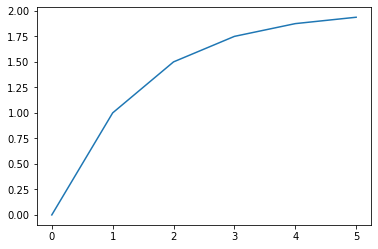

In [8]:
plt.plot(x, y)
plt.show()

### 4.Chart types

.plot(): line charts

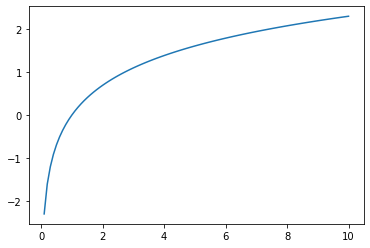

In [9]:
# DATA
x = np.linspace(0.1, 10, 100)
y = np.log(x)

# VIZ
plt.plot(x, y)
plt.show()

.scatter(): scatter plots (+ mixing chart types)

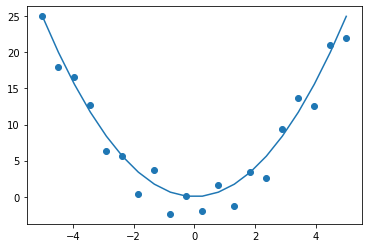

In [13]:
# DATA
x = np.linspace(-5, 5, 20)
y1 = x**2 + np.random.randint(-3.5, 3.5, 20)
y2 = x**2

# VIZ
plt.scatter(x, y1)
plt.plot(x, y2)
plt.show()

.bar(): bar chart

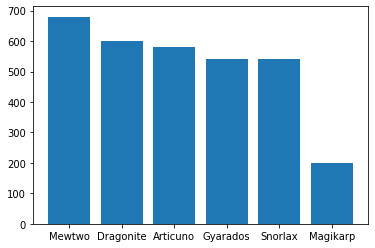

In [14]:
# DATA
x = ['Mewtwo', 'Dragonite', 'Articuno', 'Gyarados', 'Snorlax', 'Magikarp']
y = [680, 600, 580, 540, 540, 200]

# VIZ
plt.bar(x, y)
plt.show()

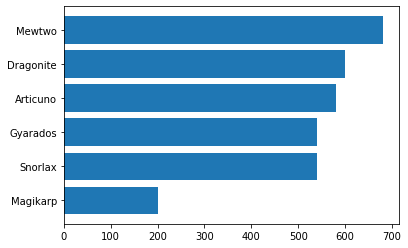

In [15]:
# VIZ
plt.barh(x[::-1], y[::-1])
plt.show()

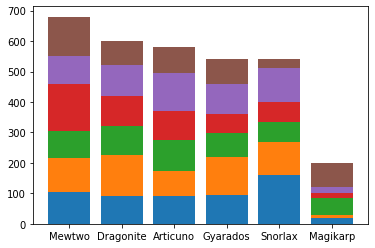

In [19]:
# DATA
htp = np.array([106, 91, 90, 95, 160, 20])
atk = np.array([110, 134, 85, 125, 110, 10])
dfs = np.array([90, 95, 100, 79, 65, 55])
sca = np.array([154, 100, 95, 60, 65, 15])
scd = np.array([90, 100, 125, 100, 110, 20])
spe = np.array([130, 80, 85, 81, 30, 80])

# VIZ
plt.bar(x, htp)
plt.bar(x, atk, bottom = htp)
plt.bar(x, dfs, bottom = htp + atk)
plt.bar(x, sca, bottom = htp + atk + dfs)
plt.bar(x, scd, bottom = htp + atk + dfs + sca)
plt.bar(x, spe, bottom = htp + atk + dfs + sca + scd)
plt.show()

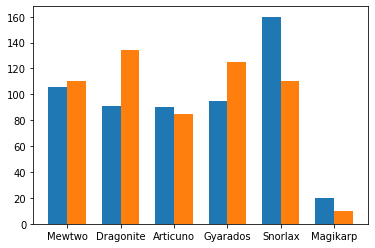

In [24]:
# DATA
pos = np.arange(len(x))
width = 0.35

# VIZ
plt.bar(pos - (width / 2), htp, width)
plt.bar(pos + (width / 2), atk, width)
plt.xticks(pos, x)
plt.show()

Check out the Matplotlib gallery for more charts: https://matplotlib.org/gallery/index.html

### 5. Getting serious with Matplotlib

Data first

- European Centre for Disease Prevention and Control, "Geographic distribution of COVID-19 cases worldwide": https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide (accessed 18/04/2020)
- Google LLC, "Google COVID-19 Community Mobility Reports": https://www.google.com/covid19/mobility/ (accessed 18/04/2020)

In [25]:
# Covid19 data
df_c = pd.read_csv('COVID-19-geographic-disbtribution-worldwide-2020-04-18.csv')
no_need = ['dateRep', 'countriesAndTerritories', 'geoId']
df_c.drop(inplace = True, columns = no_need)
rename_dict = {'countryterritoryCode': 'country_name', 'popData2018': 'country_pop'}
df_c.rename(columns = rename_dict, inplace = True)
df_c['c_date'] = df_c['day'].astype('str') + '/' + df_c['month'].astype('str') + '/' + df_c['year'].astype('str')
df_c['c_date'] = pd.to_datetime(df_c['c_date'], format = '%d/%m/%Y')
df_c_fra = df_c[df_c['country_name'] == 'FRA'].copy()

# Google mobility data
df_g = pd.read_csv('Google_Global_Mobility_Report_20200418.csv', low_memory = False)
df_g['g_date'] = pd.to_datetime(df_g['date'], format = '%d/%m/%Y')
df_g.drop(inplace = True, columns = ['date'])
df_g_fra = df_g[(df_g['country_region_code'] == 'FR') & (df_g['sub_region_1'].isna())].copy()

# Join the 2 data sets together in a new df
df_j_fra = pd.merge(df_c_fra, df_g_fra, how = 'left', left_on = 'c_date', right_on = 'g_date')
df_j_fra.drop(inplace = True, columns = ['g_date'])
df_j_fra.rename(columns = {'c_date': 'date'}, inplace = True)
df_j_fra.sort_values(['date'], ascending = True, inplace = True)
df_j_fra.reset_index(drop = True, inplace = True)

Then viz

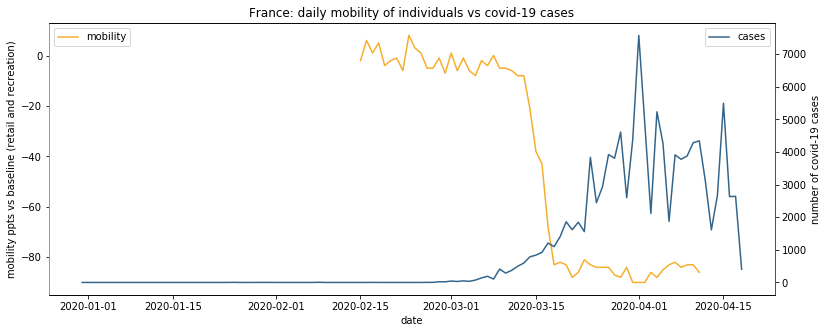

In [33]:
### THE AWESOME LINE
fig, ax = plt.subplots(figsize = (13, 5))

### STORING OUR DATA IN VARIABLES
x = df_j_fra['date']
y_mob1 = df_j_fra['retail_and_recreation_percent_change_from_baseline']
y_mob2 = df_j_fra['parks_percent_change_from_baseline']
y_cases = df_j_fra['cases']

### PLOTTING ON THE LEFT VERTICAL AXIS
ax.plot(x, y_mob1, color = '#f6ae2d')
# ax.plot(x, y_mob2, '#f6ae2d', linestyle = 'dashed')
# ax.plot(x, y_cases)

### ADDING A NEW VERTICAL AXIS ON THE RIGHT AND PLOTTING ON IT
ax2 = ax.twinx()
ax2.plot(x, y_cases, color = '#33658a')

### THE CHART TRIFECTA: TITLE, AXIS LABELS, LEGEND
ax.set(xlabel = 'date'
       , ylabel = 'mobility ppts vs baseline (retail and recreation)'
       , title = 'France: daily mobility of individuals vs covid-19 cases')
ax2.set(ylabel = 'number of covid-19 cases')
ax.legend(labels = ['mobility'], loc = 'upper left')
ax2.legend(labels = ['cases'], loc = 'upper right')

### COLORING THE VERTICAL AXES
ax2.spines['left'].set_color('#f6ae2d')
ax2.spines['right'].set_color('#33658a')

### DISPLAYING THE GRAPHS
plt.show()

Google colour picker

### 6. Outputting multiple graphs

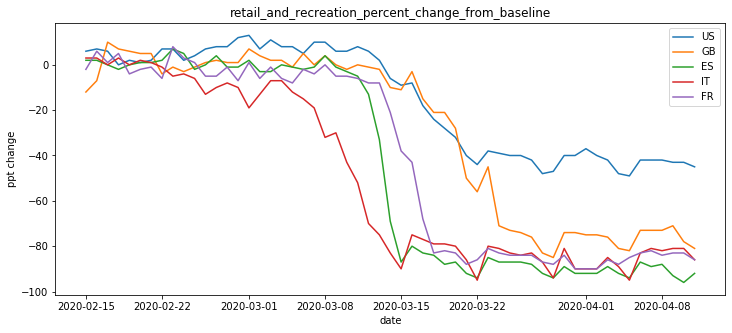

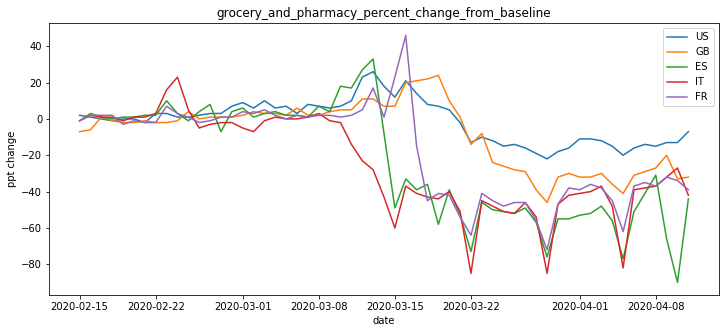

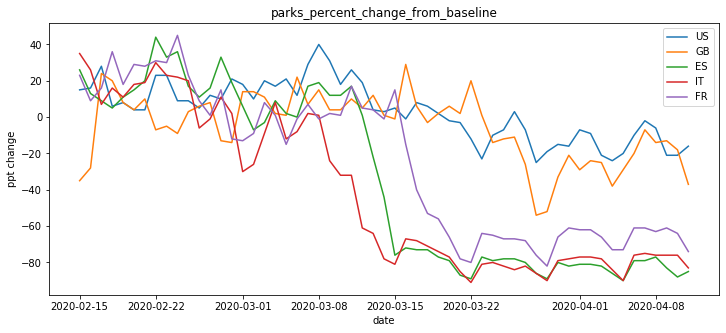

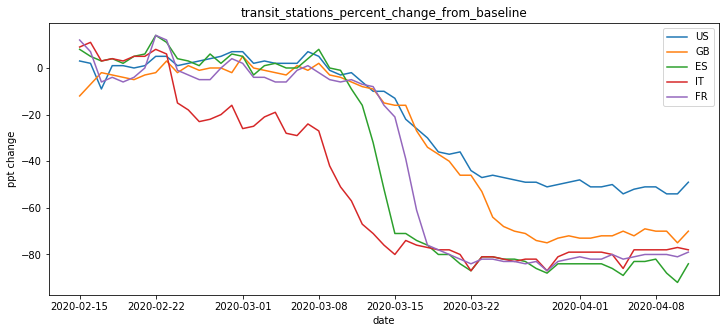

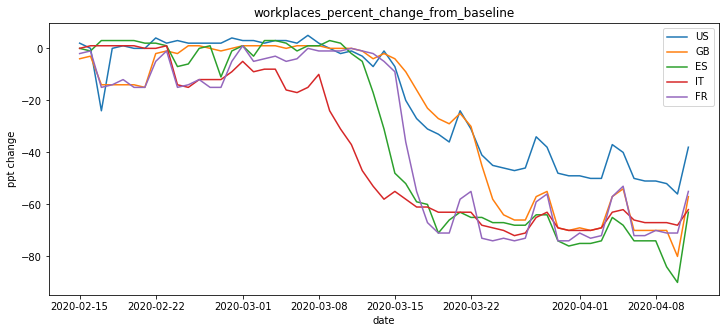

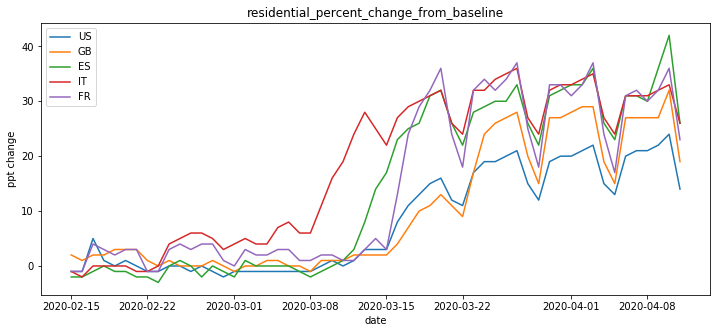

In [34]:
# THE METRICS I WANT TO PLOT
mob_types = ['retail_and_recreation_percent_change_from_baseline'
            , 'grocery_and_pharmacy_percent_change_from_baseline'
            , 'parks_percent_change_from_baseline'
            , 'transit_stations_percent_change_from_baseline'
            , 'workplaces_percent_change_from_baseline'
            , 'residential_percent_change_from_baseline']
# THE COUNTRIES I WANT TO COMPARE
country_codes = ['US', 'GB', 'ES', 'IT', 'FR']

# LOOP NO 1
for var in mob_types:
    d = {}
    # THE AWESOME LINE
    fig, ax = plt.subplots(figsize = (12, 5))
    # LOOP NO 2
    for country in country_codes:
        # DATA
        d[country] = df_g[(df_g['country_region_code'] == country) & (df_g['sub_region_1'].isna())].copy()
        x = d[country]['g_date']
        y =  d[country][var]
        # VIZ
        ax.plot(x, y)
        ax.legend(labels = country_codes)
        ax.set(xlabel = 'date'
               , ylabel = 'ppt change'
               , title = var)
    plt.show()

### 7. Making pretty stuff with seaborn

Boxplots - Classic titanic dataset from Kaggle (training set only): https://www.kaggle.com/c/titanic/data

In [35]:
df_t = pd.read_csv('titanic_train.csv')
df_t.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
384,385,0,3,"Plotcharsky, Mr. Vasil",male,NaN,0,0,349227,7.8958,NaN,S
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C
183,184,1,2,"Becker, Master. Richard F",male,1.0,2,1,230136,39.0000,F4,S


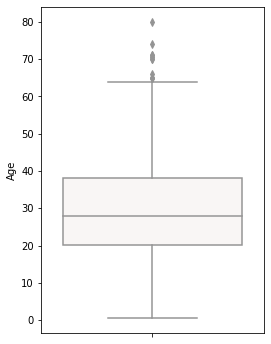

In [36]:
fig, ax = plt.subplots(figsize = (4, 6))
ax = sns.boxplot(data = df_t, y = 'Age', palette = 'vlag')
plt.show()

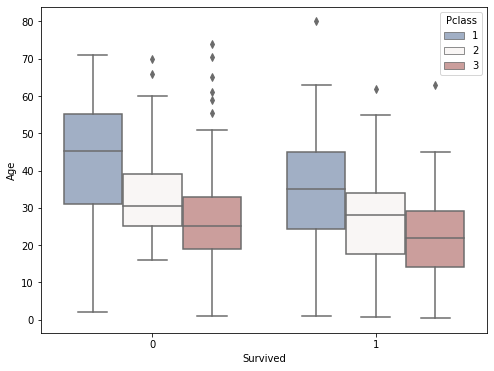

In [38]:
fig, ax = plt.subplots(figsize = (8, 6))
ax = sns.boxplot(data = df_t
                 , x = 'Survived'
                 , y = 'Age'
                 , hue = 'Pclass'
                 , palette = 'vlag')
plt.show()

Heatmap - back to our Google mobility data

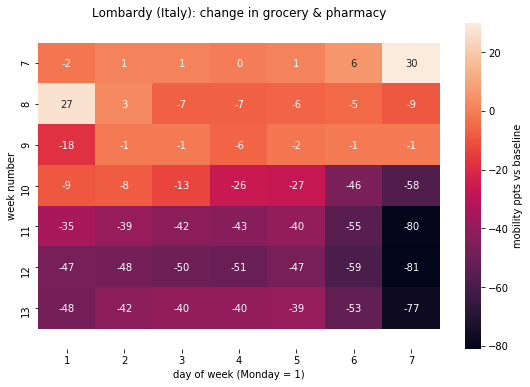

In [43]:
# DATA
df_g_lbd = df_g[(df_g['country_region_code'] == 'IT') & (df_g['sub_region_1'] == 'Lombardy')].copy()
df_g_lbd['dow'] = df_g_lbd['g_date'].dt.strftime('%w').astype('int')
df_g_lbd['dow'] = np.where(df_g_lbd['dow'] == 0, 7, df_g_lbd['dow'])
df_g_lbd['week'] = df_g_lbd['g_date'].dt.strftime('%W').astype('int')
df_g_lbd_hm = df_g_lbd[['week', 'dow', 'grocery_and_pharmacy_percent_change_from_baseline']].copy()
df_g_lbd_hm = df_g_lbd_hm[(df_g_lbd_hm['week'] > 6) & (df_g_lbd_hm['week'] < 14)]
df_g_lbd_hm = df_g_lbd_hm.pivot(index = 'week', columns = 'dow', values = 'grocery_and_pharmacy_percent_change_from_baseline')

# VIZ
fig, ax = plt.subplots(figsize = (9, 6))
ax = sns.heatmap(df_g_lbd_hm
                 , annot = True
                 , cbar_kws = {'label': 'mobility ppts vs baseline'}) 
ax.set(xlabel = 'day of week (Monday = 1)'
       , ylabel = 'week number'
       , title = 'Lombardy (Italy): change in grocery & pharmacy')
ax.set_ylim(bottom = len(df_g_lbd_hm) + 0.5, top = - 0.5) # https://github.com/mwaskom/seaborn/issues/1773
plt.show()

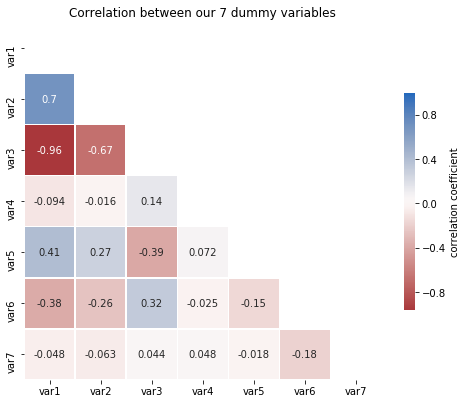

In [44]:
# DATA
x = np.linspace(-5, 5, 100)
my_data = {'var1': x
           , 'var2': (2 * x) + 10 + np.random.randint(-10, 10, 100)
           , 'var3': (-6 * x) + np.random.randint(-10, 10, 100)
           , 'var4': np.sin(np.exp(x)) + np.random.randint(-10, 10, 100)
           , 'var5': x + np.sin(x) + np.random.randint(-10, 10, 100)
           , 'var6': (np.cos(x) * np.exp(x)) + np.random.randint(-10, 10, 100)
           , 'var7': (x**2) + np.random.randint(-10, 10, 100)}
my_columns = my_data.keys()
df_mu = pd.DataFrame(data = my_data, columns = my_columns)           
corr = df_mu.corr(method = 'pearson')
mask = np.zeros_like(corr, dtype = np.bool) 
mask[np.triu_indices_from(mask)] = True 

# VIZ
fig, ax = plt.subplots(figsize = (8, 8))
ax = sns.heatmap(corr
                 , mask = mask
                 , square = True
                 , linewidths = .5
                 , cbar_kws = {'shrink': 0.5, 'label': 'correlation coefficient'}
                 , cmap = 'vlag_r'
                 , annot = True)
ax.set(title = 'Correlation between our 7 dummy variables')
bottom, top = ax.get_ylim() # https://github.com/mwaskom/seaborn/issues/1773
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Pair plot with the classic iris data set

In [45]:
sns.get_dataset_names()

C:\Users\aeymin\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\utils.py:376: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 376 of the file C:\Users\aeymin\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

In [46]:
df_i = sns.load_dataset('iris')
df_i.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
24,4.8,3.4,1.9,0.2,setosa
125,7.2,3.2,6.0,1.8,virginica
93,5.0,2.3,3.3,1.0,versicolor
35,5.0,3.2,1.2,0.2,setosa
47,4.6,3.2,1.4,0.2,setosa


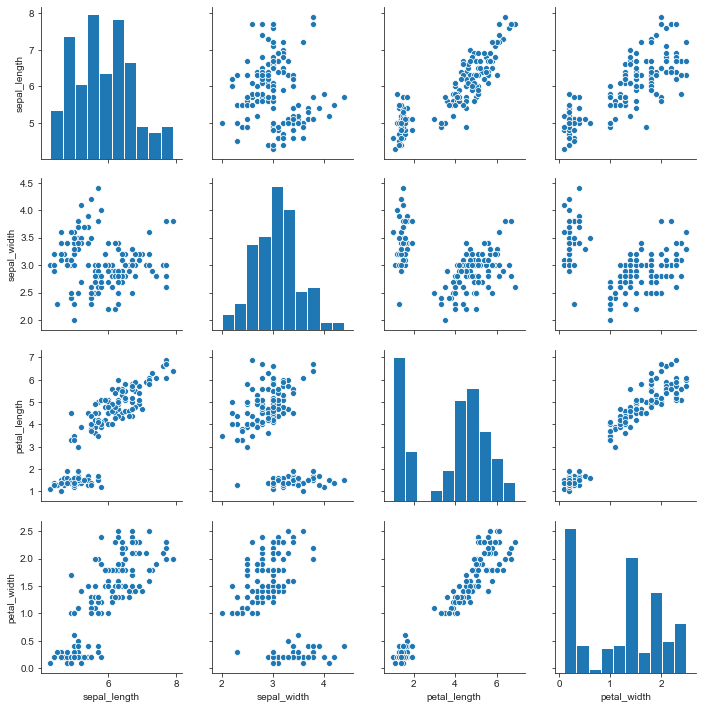

In [47]:
sns.set_style('ticks')
sns.pairplot(df_i)

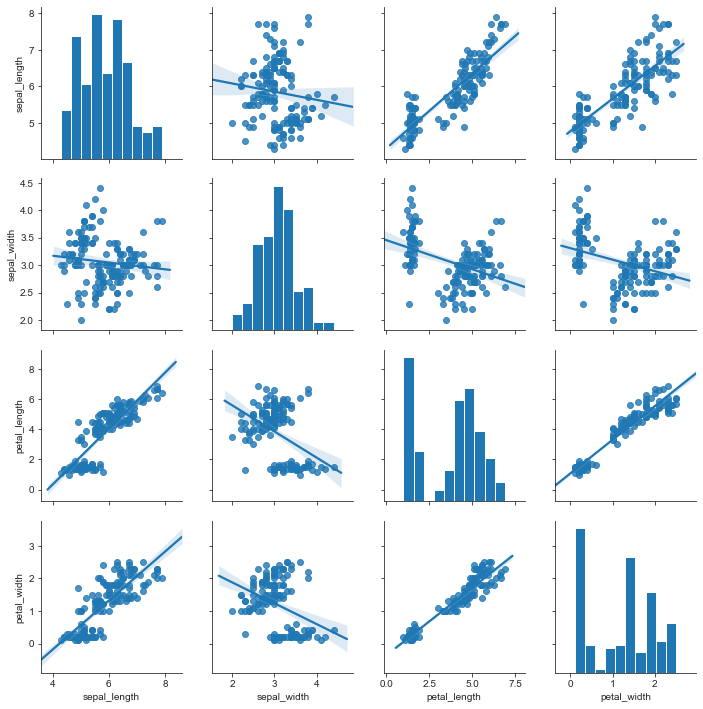

In [48]:
sns.pairplot(df_i, kind = 'reg')

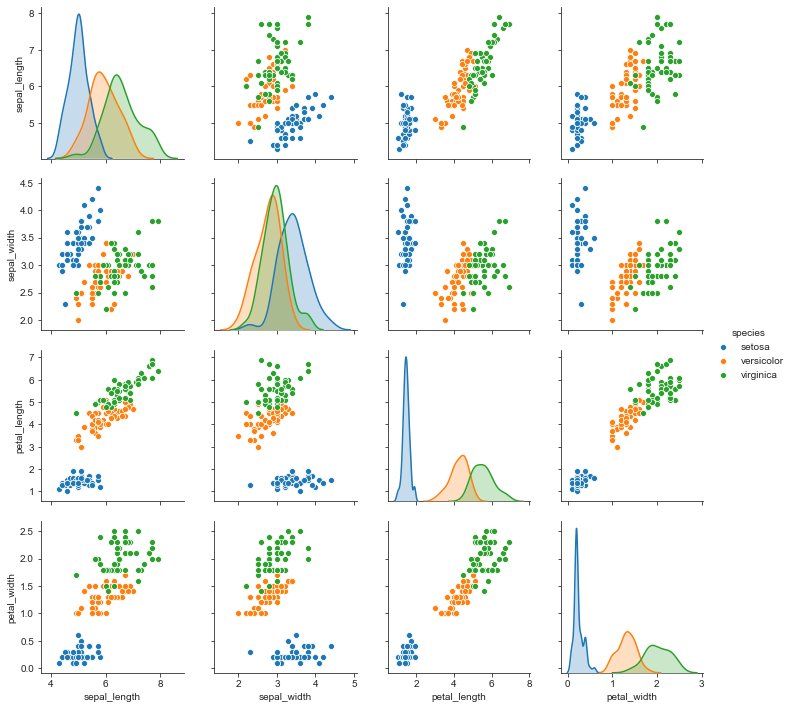

In [49]:
sns.pairplot(df_i, hue = 'species')

Check out the Seaborn gallery for more charts: https://seaborn.pydata.org/examples/index.html